# 05 회귀

## [01] 회귀 소개

회귀(regression)
- 현대 통계학의 주요 기둥 중 하나
- 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법

- 여러 개의 독립 변수와 한 개의 종속 변수 간의 상관관계를 모델링하는 기법
- 최적의 회귀 계수를 찾아내는 것
 - 회귀 계수 (Regressioni Coefficients) : 독립변수의 값에 영향을 미치는 회귀 계수
 - 독립변수는 피처, 종속변수는 결정 값

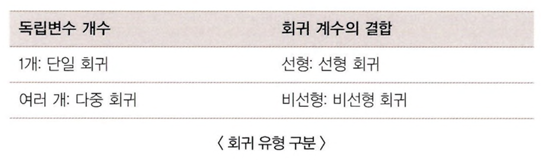

지도학습
- 분류 : 예측값이 이산형 클래스 값
- 회귀 : 예측값이 연속형 숫자 값

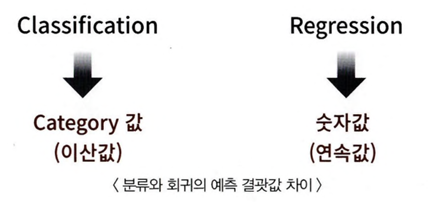

선형회귀
- 규제 (Reqularization) 방법에 따라 유형을 나눌 수 있음
 - 규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수의 패널티 값을 적용하는 것
- 선형 회귀 모델
 - 일반 선형 회귀
 - 릿지
 - 라쏘
 - 엘라스틱넷
 - 로지스틱 회귀 : 사실상 분류에 사용되는 선형 모델

## [02] 단순 선형 회귀를 통한 회귀 이해
단순 선형 회귀 : 독립변수도 하나, 종속변수도 하나인 선형 회귀
- 잔차(남은 오류) : 실제 값과 회귀 모델의 차이에 따른 오류 값

최적의 회귀 모델 만들기 : 잔차 합이 최소가 되는 모델 만들기, 오류 값 합이 최소가 되도록 하는 최적의 회귀 계수 찾기

오류 합 계산 방식
- 절댓값 취해서 더하기
- 오류 값의 제곱을 더하는 방식 (RSS)

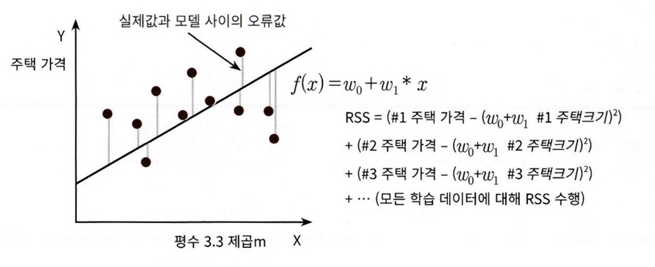

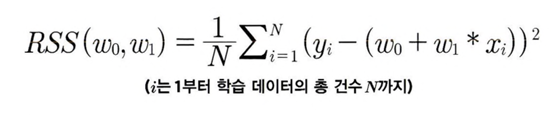

- RSS : 비용
- W 변수(회귀 계수)로 구성되는 RSS : 비용함수(손실함수 Loss Function)

머신러닝 회귀 알고리즘 : 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값 (오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값 구하니

## [03] 비용 최소화하기 - 경사하강법 (Gradiend Descenst) 소개

경사하강법 : 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
- 미분값이 0이 되는 (최소가 되는) 점이 비용함수가 최소인 점
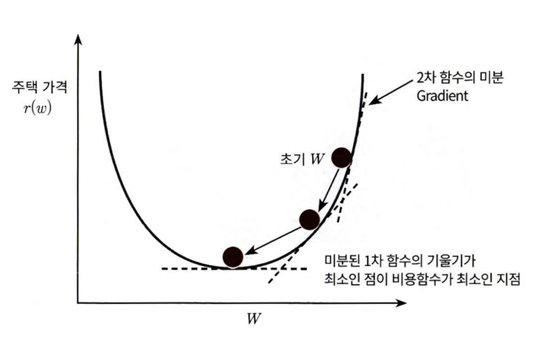

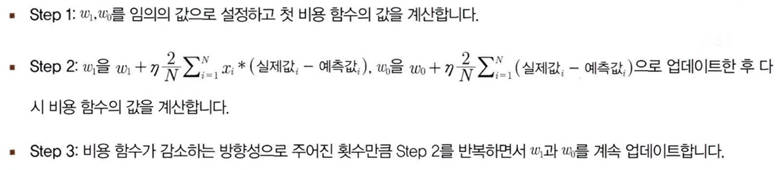

[경사하강법을 파이썬 코드로 구현]

회귀식 y = 4x + 6을 근사하기 위한 100개의 데이터 세트 만들고 경사하강법을 이용해 회귀 계수 w1, w2 도출

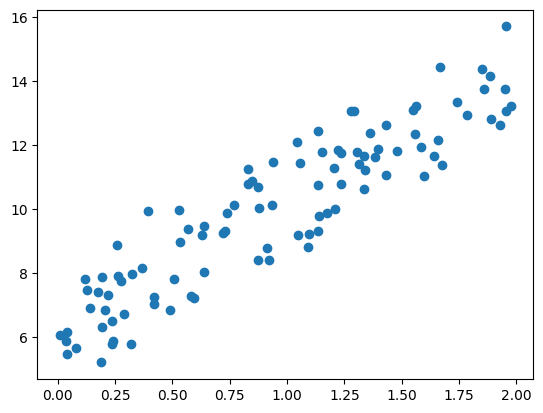

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y =4x + 6을 근사 (w1=4, w0=6), 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

-> 데이터는 y = 4x + 6 을 중심으로 무작위로 퍼져 있음

비용함수 정의하기

In [ ]:
# 비용 함수 (get_cost) 정의하기
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square( y - y_pred )) / N
    return cost

경사하강법법 구현하기

- gradient_descent() : w1과 w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트함

- get_weight_updates()
 - 입력 배열 x값에 대한 예측 배열 y_pred : np.dot(X, w1.T) + w0
 - 예측값 = w0 + X(1)*w1 + X(2)*w1 + ... + X(100)*w1 = X @ w1

In [ ]:
# w1과 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01) :
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

- gradient_descent_steps() 함수 : get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트하는 함수

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000) :
    # w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

- gradient_descent_steps() 호출해서 w1, w0 구하기
- get_cost() : 최종적으로 예측값과 실제값의 RSS 차이를 계산
- 경사 하강법의 예측 오류 계산

In [ ]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


-> w1 은 4와 유사하게 4.022
-> w0 은 6과 유사하게 6.162

y_pred에 기반해 회귀선 그리기

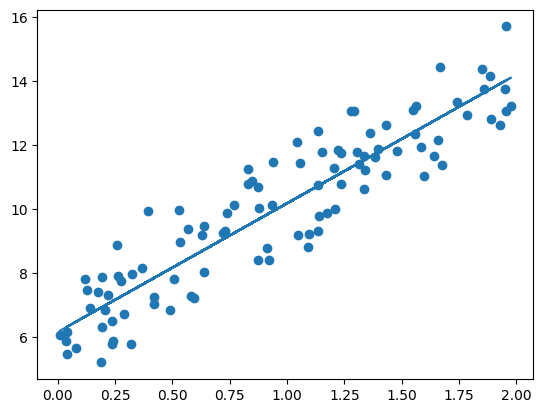

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

- 경사하강법 : 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트 -> 수행 시간이 매우 오래 걸림

- 확률적 경사 하강법 (실전에서 사용) : 일부 데이터로 w가 업데이트되는 값을 계산

확률적 경사 하강법
- stochastic_gradient_descent_steps() 함수 구현

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters=1000) :
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters) :
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해서 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이터
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

- stochastic_gradient_descent_steps() 이용 : w1, w0 및 예측 오류 비용 계산하기

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print('w1:', round(w1[0,0], 3), 'w0:', round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:4f}'. format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.993711


-> 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 것과 큰 차이가 없음

-> 예측 오류 비용은 0.9937로 경사하강법으로 구한 예측 오류 비용보다 조금 높음, 예측 성능상의 차이가 거의 없음

[피처가 여러 개인 경우 회귀 계수 도출하기]

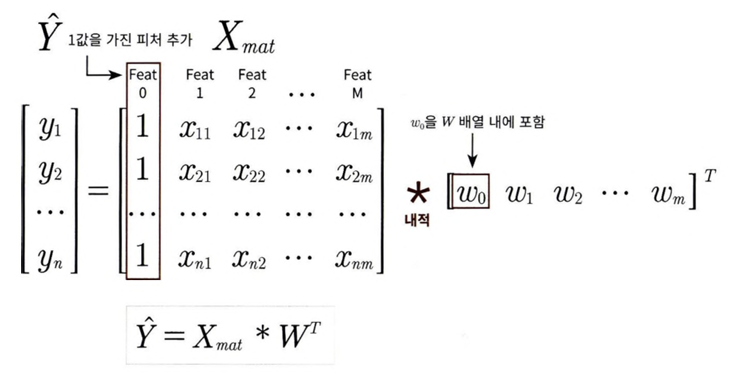

## [04] 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

### [LinearRegression 클래스 - Ordinary Least Squares]

예측값과 실제 값의 RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스

fit() 메서드로 X, y 배열 입력 -> 회귀 계수인 W를 coef_ 속성에 저장


```
class sklearn.linear_model.LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)
```



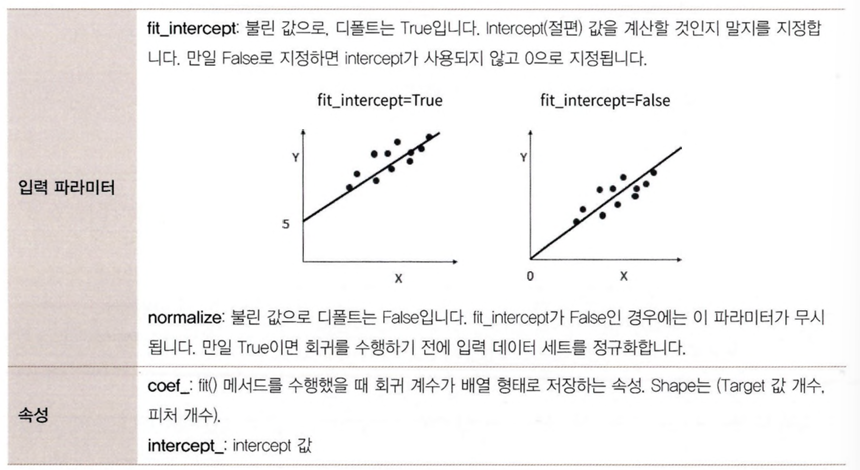

다중 공산성 (multi-collinearity) 문제
- Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독릭성에 많은 영향을 받음
- 피처 간 상관관계가 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐
- 상관관계가 높은 피처가 많은 경우 : 독립적인 주요한 피첨나 남기고 제거하거나 규제를 적용
- 매우 많은 피처가 다중 공산성 문제를 가지는 경우 : PCA 를 통해 차원 축소를 수행

### [회귀 평가 지표]

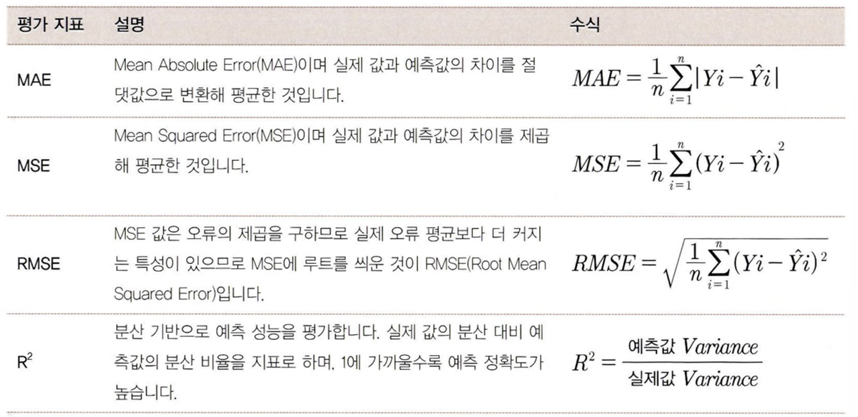

### [LinearRegression을 이용해 보스턴 주택 가격 회귀 구현]

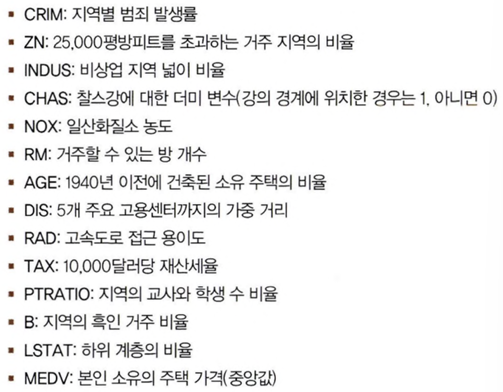

사이킷런은 보스턴 주택 가격 데이터 세트를 load_boston()을 통해 제공

해당 데이터 세트 로드, DataFrame으로 변경하기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
boston = pd.read_excel('/content/drive/MyDrive/2024-2 빅데분/data_bigdata/boston.xlsx')
bostonDF = boston.drop('target', axis=1)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2

-> Null 값은 없으며 모두 float 형

총 8개의 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인하기
- seaborn 의 regplot() : X, Y 축 값의 산점도와 함께 선형 회귀 직선 그려줌
- matplotlib.subplots() 이용 : 각 ax마다 칼럼과 PRICE의 관계 표현

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features) :
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

-> RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남




LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델 만들기
- train_test_split() 이용 : 학습과 테스트 데이터 세트 분리
- metrics 모듈의 mean_square_error()와 r2_score() API 를 이용해 MSE와 R2 Score 측정하기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format (r2_score(y_test, y_preds)))

In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

5개의 폴드 세트에서 cross_val_score() 이용 : 교차검증으로 MSE, RMSE 측정
- cross_val_score()의 인자로 scoring = 'neg_mean_squared_error' 지정 : 반환하는 수치 값이 음수 값
- 반환된 값에 -1을 다시 곱해야 양의 값인 원래 모델에서 계산된 MSE 값을 구할 수 있음
- RMSE 는 MSE 수치로 직접 변환하여 구하기 (MSE 값에 넘파이의 sqrt() 함수 적용)


In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구하기
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores :' , np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}', format(avg_rmse))

## [05] 다항회귀와 과(대)적합/과소적합 이해
### [다항 회귀 이해]
다항 회귀 : 회귀가 2차, 3차 방정식과 같은 다항식으로 표현되는 것

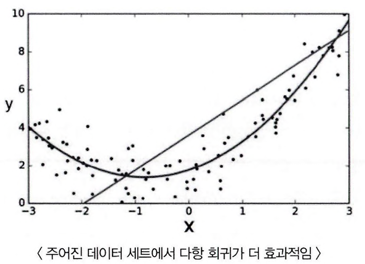

비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현 (다항 회귀 역시 선형 회귀이므로)

** 사이킷런은 다항 회귀를 위한 클래스를 제공하지 않음

- PolynomialFeatures 클래스 통해 피처를 Polynominal(다항식) 피처로 변환

In [ ]:
# PolynominalFeature 이용해 단항값 [x1, x2] 를 2차 다항값 [1, x1, x2, x1^2, x1*x2, x2^2] 로 변환

from sklearn. preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]] 의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

In [ ]:
# 3차 다항 계수를 이용해 3차 다항 함수 회귀식 유도하기

def polynomial_func(X) :
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

In [ ]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)

-> 일차 단항식 계수 피처는 2개 -> 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 증가

사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하기

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X) :
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('Poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

### [다항 회귀를 이용한 과소적합 및 과적합 이해]
- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있음
- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능
- 다항 회귀의 차수가 높아질수록 학습 데이터에만 너무 맞춘 학습이 이루어짐 -> 테스트 데이터 환경에서는 예측 정확도가 떨어짐
- 차수가 높아질수록 과적합의 문제가 크게 발생

다항 회귀를 이용해 과소적합과 과적합의 문제를 잘 보여주는 예제
- 원래 데이터 세트는 피처 X와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계를 가지도록 만듦
- 다항 회귀의 차수를 변화시키면서 그에 따른 예측 곡선과 예측 정확도를 비교

In [ ]:
# 다항 회귀를 이용해 과소적합과 과적합의 문제를 잘 보여주는 예제

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 x 값에 대해 코사인 변환 값을 반환
def true_fun(X) :
    return np.cos(1.5*np.pi *X)

# X 는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과 비교하기

In [ ]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수 (degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i +1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수를 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'. format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label = 'True function')
    plt.scatter(X, y, edgecolor = 'b', s= 20, label='Samples')

    plt.xlabel('x');plt.ylabel('y');plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

-> 실선 : 다항 회귀 예측 곡선

-> 점선 : 실제 데이터 세트 X, Y 코사인 곡선

-> 학습 데이터는 0부터 1까지 30개의 임의의 X 값과 그에 따른 코사인 Y 값에 잡음을 변동 값으로 추가해 구성

-> MSE 평가 : 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것

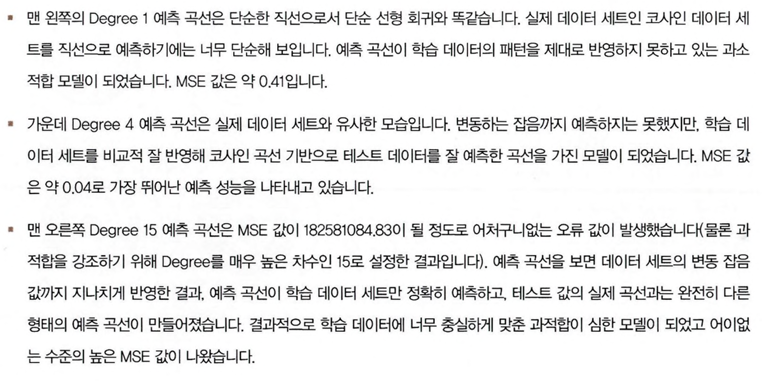

### [편향-분산 트레이드오프]

- 고편향성/고분산성
 - 고편향성 : 앞의 Degree 1과 같은 모델은 매우 단순화된 모델, 지나치게 한 방향성으로 치우친 경향
 - 고분산성 : Degree 15와 같은 모델은 학습 데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델, 지나치게 높은 변동성

- 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향
 - 편향이 높으면 분산은 낮아지고 (과소적합)
 - 편향이 낮으면 분산이 높음 (과적합)

- 편향이 너무 높으면 전체 오류가 높고, 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아짐
- 편향과 분산이 서로  트레이드 오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델 구축하기

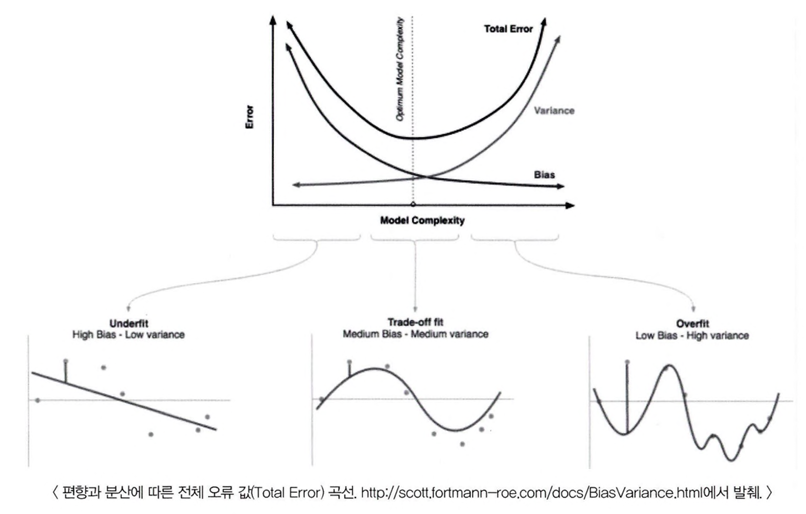

# 05 회귀

## [06] 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

### [규제 선형 모델 개요]
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함
- 비용함수
 - RSS 최소화 방법 : 학습 데이터의 잔차 오류 값을 최소로 하기
 - 과적합 방지 : 회귀 계수 값의 크기 제어

 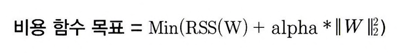

- alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기를 제어하는 튜닝 파라미터
 [비용 함수 목표가 위의 식을 최소화하는 W 벡터를 찾는 것 : alpha의 역할]
 - alpha 값이 클 때 : 비용 함수는 회귀 계수 W 의 값을 작게 -> 과적합 개선
 - alpha 값이 작을 때 : 회귀 계수 W의 값이 커져도 어느 정도 상쇄 가능 -> 학습 데이터 적합을 더 개선

 - 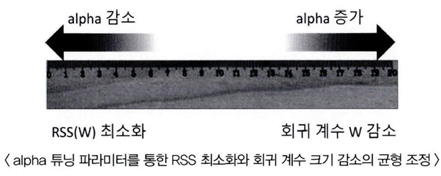

- 규제 (Regulation)
 - alpha를 0에서부터 지속적으로 값을 증가 -> 회귀 계수 값의 크기 감소 -> 과적합 개선
 - L2 방식 - 릿지(Ridge) 회귀 : W의 제곱에 대해 패널티 부여
 - L1 방식 - 라쏘(Lasso) 회귀 : W의 절댓값에 패널티 부여, 영향력이 크지 않은 회귀 계수 값을 0으로 변환

### [릿지 회귀]
- 사이킷런의 Ridge 클래스
 - 주요 생성 파라미터 : alpha = 릿지 회귀의 alpha L2 규제 계수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
boston = pd.read_excel('/content/drive/MyDrive/2024-2 빅데분/data_bigdata/boston.xlsx')
bostonDF = boston.drop('target', axis=1)


# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

Boston 데이터 세트 크기: (506, 14)


- 보스턴 주택 가격을 Ridge 클래스를 이용해 예측하기
 - 예측 성능을 cross_val_score()로 평가

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10 으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE :{0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores : [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE :5.518


-> 5개 폴드 세트의 평균 RMSE는 5.518 : 규제가 없는 LinearRegression(앞 예제)의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능

릿지의 alpha 값을 0, 0.1, 1, 10, 100 으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴보기

In [ ]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = {0, 0.1, 1, 10, 100}

# alphas list 값을 반복하면서 alpha 에 따른 평균 rmse 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용해 5 폴드의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RSME :{1:.3f}' .format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RSME :5.829
alpha 1 일 때 5 folds의 평균 RSME :5.653
alpha 0.1 일 때 5 folds의 평균 RSME :5.788
alpha 100 일 때 5 folds의 평균 RSME :5.330
alpha 10 일 때 5 folds의 평균 RSME :5.518


-> alpha가 100일 떄 평균 RMSE 가 가장 좋음

alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화하기

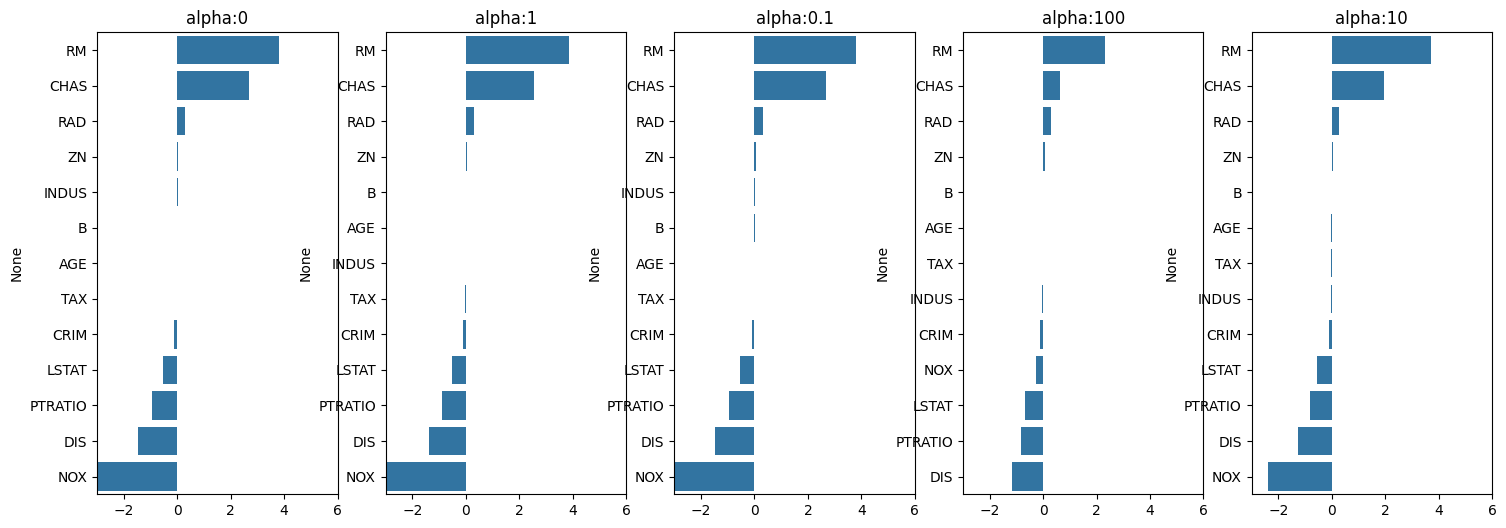

In [ ]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize = (18,6), nrows = 1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변화하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

-> alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐

In [ ]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' +str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending=False)

alpha:0    alpha:1  alpha:0.1  alpha:100  alpha:10
RM        3.809865   3.854000   3.818233   2.334536  3.702272
CHAS      2.686734   2.552393   2.670019   0.638335  1.952021
RAD       0.306049   0.290142   0.303515   0.315358  0.279596
ZN        0.046420   0.047443   0.046572   0.054496  0.049579
INDUS     0.020559  -0.008805   0.015999  -0.052826 -0.042962
B         0.009312   0.009673   0.009368   0.009393  0.010037
AGE       0.000692  -0.005415  -0.000269   0.001212 -0.010707
TAX      -0.012335  -0.012912  -0.012421  -0.015856 -0.013993
CRIM     -0.108011  -0.104595  -0.107474  -0.102202 -0.101435
LSTAT    -0.524758  -0.533343  -0.525966  -0.660764 -0.559366
PTRATIO  -0.952747  -0.876074  -0.940759  -0.829218 -0.797945
DIS      -1.475567  -1.372654  -1.459626  -1.153390 -1.248808
NOX     -17.766611 -10.777015 -16.684645  -0.262847 -2.371619

### [라쏘 회귀]
- 라쏘 회귀 비용 함수의 목표 : RSS(W) + alpha*|W| 식을 최소화하는 W 값 찾기
- L1 규제 : 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거
    - 적절한 피처만 회귀에 포함시키는 피처 선택의 특징

get_linear_reg_eval() 함수

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE 를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True) :
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, '######')
    for param in params :
        if model_name == 'Ridge' : model = Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        # cross_val_score는 evaluation metric 만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n, y_target_n)
        if return_coeff :
            # alpha 에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:' +str(param)
            coeff_df[colname] = coeff

    return coeff_df
#end of get linear_regre_evalm

In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n=X_data, y_target_n = y_target)

###### Lasso ######
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.189


In [ ]:
# 반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.789725   3.703202   2.498212  0.949811  0.000000
CHAS       1.434343   0.955190   0.000000  0.000000  0.000000
RAD        0.270936   0.274707   0.277451  0.264206  0.061864
ZN         0.049059   0.049211   0.049544  0.049165  0.037231
B          0.010248   0.010249   0.009469  0.008247  0.006510
NOX       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
AGE       -0.011706  -0.010037   0.003604  0.020910  0.042495
TAX       -0.014290  -0.014570  -0.015442 -0.015212 -0.008602
INDUS     -0.042120  -0.036619  -0.005253 -0.000000 -0.000000
CRIM      -0.098193  -0.097894  -0.083289 -0.063437 -0.000000
LSTAT     -0.560431  -0.568769  -0.656290 -0.761115 -0.807679
PTRATIO   -0.765107  -0.770654  -0.758752 -0.722966 -0.265072
DIS       -1.176583  -1.160538  -0.936605 -0.668790 -0.000000

### [엘라스틱넷 회귀]
- L2 규제외 L1 규제를 결합한 회귀
- RSS(W) + alpha2 * |W| + alpha1 * |W| 식을 최소화하는 w를 찾는 것
- 상대적으로 수행시간이 오래 걸림

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n = y_target)

###### ElasticNet ######
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.068


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.574162   3.414154   1.918419  0.938789  0.000000
CHAS       1.330724   0.979706   0.000000  0.000000  0.000000
RAD        0.278880   0.283443   0.300761  0.289299  0.146846
ZN         0.050107   0.050617   0.052878  0.052136  0.038268
B          0.010122   0.010067   0.009114  0.008320  0.007020
AGE       -0.010116  -0.008276   0.007760  0.020348  0.043446
TAX       -0.014522  -0.014814  -0.016046 -0.016218 -0.011417
INDUS     -0.044855  -0.042719  -0.023252 -0.000000 -0.000000
CRIM      -0.099468  -0.099213  -0.089070 -0.073577 -0.019058
NOX       -0.175072  -0.000000  -0.000000 -0.000000 -0.000000
LSTAT     -0.574822  -0.587702  -0.693861 -0.760457 -0.800368
PTRATIO   -0.779498  -0.784725  -0.790969 -0.738672 -0.423065
DIS       -1.189438  -1.173647  -0.975902 -0.725174 -0.031208

### [선형 회귀 모델을 위한 데이터 변환]

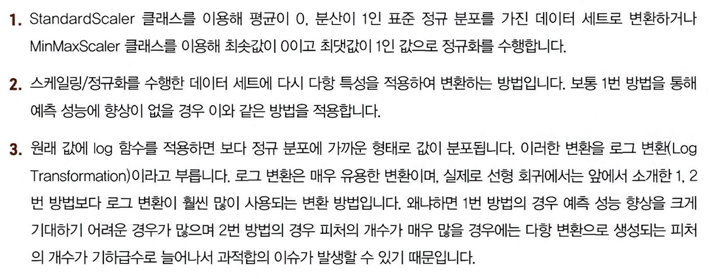

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p-degree는 다항식 특성을 추가할 때 적용. p-degree는 2 이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None) :
  if method == 'Standard' :
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax' :
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log' :
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None :
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

  return scaled_data


In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 포준정규 분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods :
  X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
  print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)



## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5폴드 세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5폴드 세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 8.827
alpha 1일 때 5폴드 세트의 평균 RMSE: 6.871
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.485
alpha 100일 때 5폴드 세트의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5폴드 세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.298
alpha 1일 때 5폴드 세트의 평균 RMSE: 4.323
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.185
alpha 100일 때 5폴드 세트의 평균 RMSE: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 4.770
alpha 1일 때 5폴드 세트의 평

## [07 로지스틱 회귀]
로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 시그모이드(sigmoid) 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정

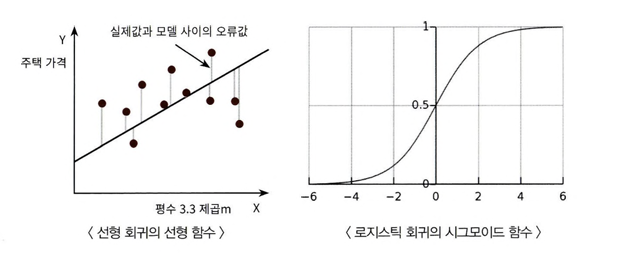


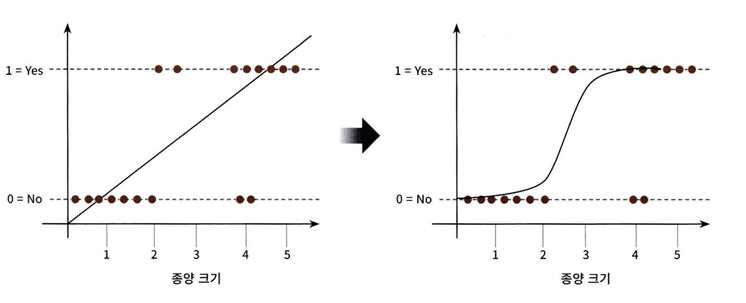

사이킷런의 LogisticRegression 클래스 이용 -> 위스콘신 유방암 데이터 세트 기반에서 로지스틱 회귀로 암 여부 판단

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardSclaer()로 평균이 0이고 분산이 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3,
                                                    random_state=0)


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행.
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds_proba)))


accuracy: 0.977, roc_auc:0.995


In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러 개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
  lr_clf = LogisticRegression(solver=solver, max_iter=600)
  lr_clf.fit(X_train, y_train)
  lr_preds = lr_clf.predict(X_test)
  lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

  # accuracy와 roc_auc 측정
  print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds_proba)))


solver:lbfgs, accuracy: 0.977, roc_auc:0.995
solver:liblinear, accuracy: 0.982, roc_auc:0.995
solver:newton-cg, accuracy: 0.977, roc_auc:0.995
solver:sag, accuracy: 0.977, roc_auc:0.995
solver:saga, accuracy: 0.982, roc_auc:0.995


In [ ]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))


최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


## 08. 회귀 트리
트리를 기반으로 하는 회귀 방식

데이터 세트의 X 피처를 결정 트리 기반으로 분할 -> X 값이 균일도를 반영한 지니 계수에 따라 다음 그림의 왼쪽과 같이 분할

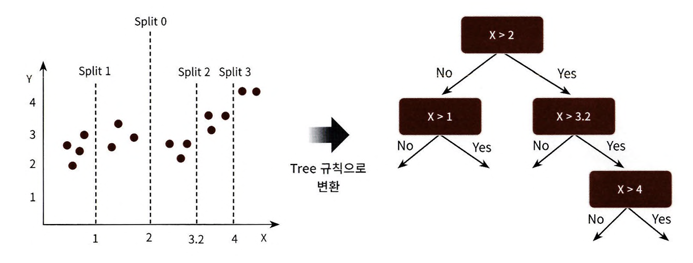

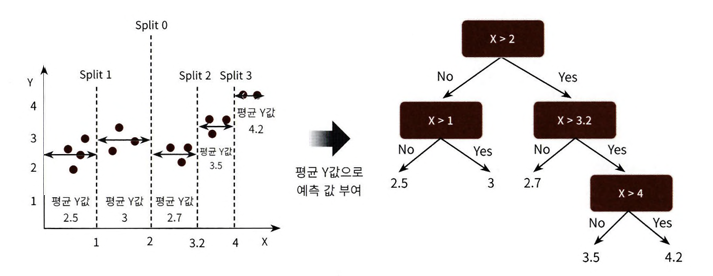

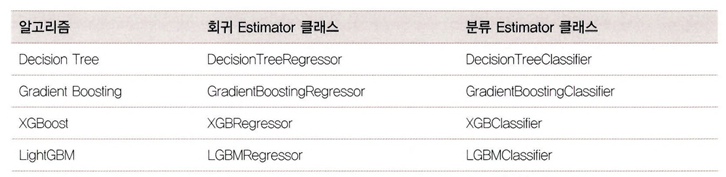

사이킷런의 랜덤 포레스트 회귀 트리인 RandomForestRegressor 를 이용 -> 보스턴 주택 가격 예측

In [ ]:
# from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# 교재
# 보스턴 데이터 세트 로드
# boston = load_boston()
# bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]
bostonDF = pd.DataFrame(data, columns=feature_names)
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

bostonDF = pd.DataFrame(data, columns=feature_names)
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

rf = RandomForestRegressor(random_state=0, n_estimators=100)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

Boston 데이터 세트 크기: (506, 14)
Boston 데이터 세트 크기: (506, 14)
5 교차 검증의 개별 Negative MSE scores:  [ -8.04 -13.58 -18.16 -47.62 -20.45]
5 교차 검증의 개별 RMSE scores : [2.84 3.68 4.26 6.9  4.52]
5 교차 검증의 평균 RMSE: 4.441


In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt( -1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('#####', model.__class__.__name__, '#####')
  print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models :
  get_model_cv_prediction(model, X_data, y_target)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<Axes: xlabel='None', ylabel='None'>

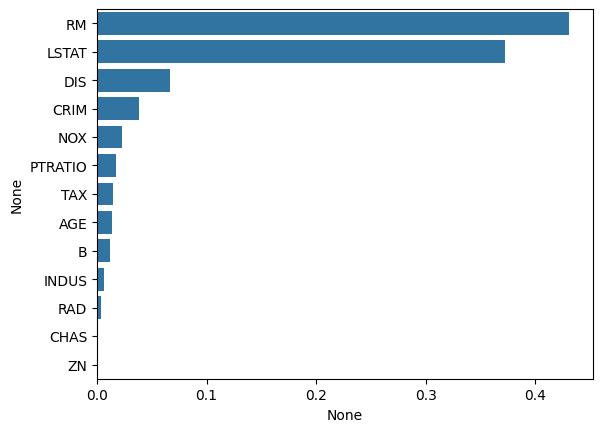

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_test, y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


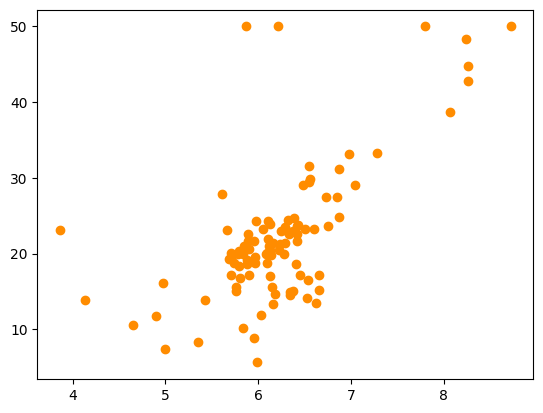

In [ ]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_dapth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


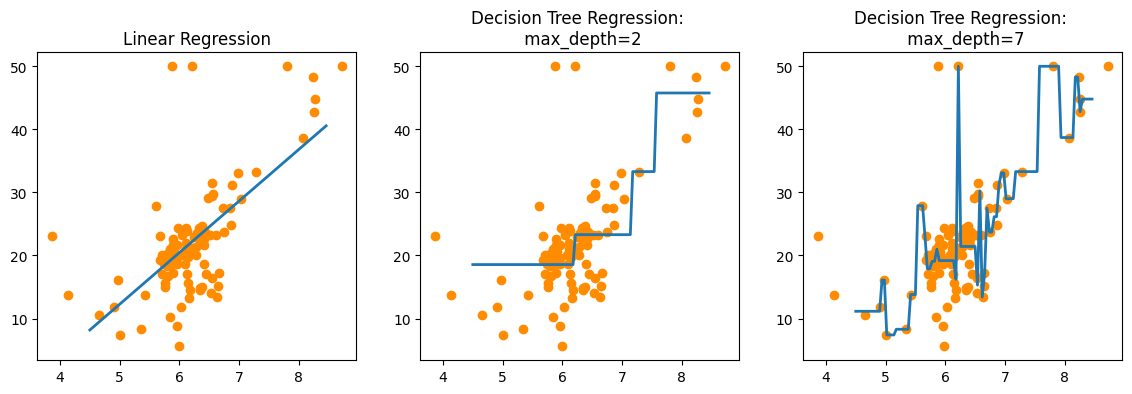

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# X 축 값을 4.5 ~ 8.5로 변환하며 입력했을 떄 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 떄 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)